In [7]:
%pylab inline

import ee
import geemap

# import the cartoee functionality from geemap
from geemap import cartoee

Populating the interactive namespace from numpy and matplotlib


In [8]:
geemap.ee_initialize()

Plotting an image¶
In this first example we will explore the most basic functionality including plotting and image, adding a colorbar, and adding visual aethetic features. Here we will use SRTM data to plot global elevation.

In [9]:
# get an image
srtm = ee.Image("CGIAR/SRTM90_V4")

In [10]:
region = [-180, -60, 180, 85] # define bounding box to request data
vis = {'min':0, 'max':3000} # define visualization parameters for image

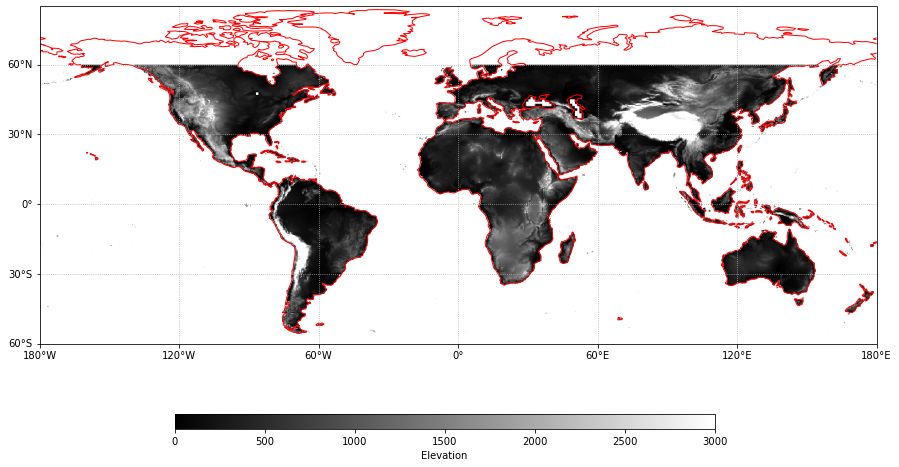

In [11]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(srtm, region=region, vis_params=vis)

# add a colorbar to the map using the visualization params we passed to the map
cartoee.add_colorbar(ax, vis, loc="bottom", label="Elevation", orientation="horizontal")

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[60,30], linestyle=":")

# add coastlines using the cartopy api
ax.coastlines(color="red")

show()

This is a decent map for minimal amount of code. But we can also easily use matplotlib colormaps to visualize our EE results to add more color. Here we add a cmap keyword to the .get_map() and .add_colorbar() functions.

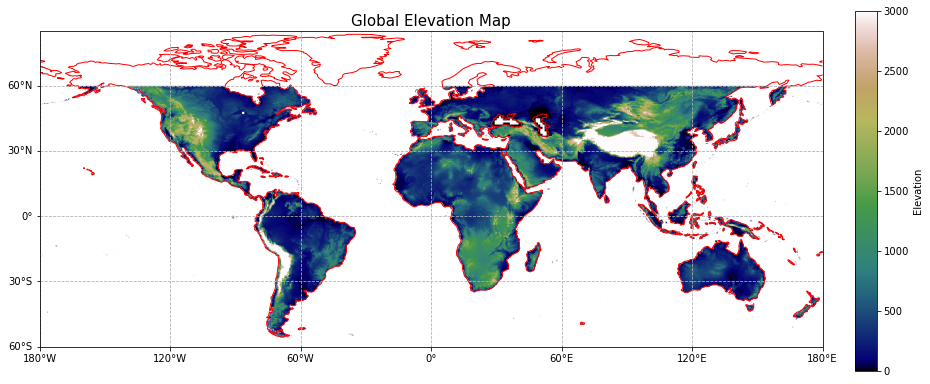

In [12]:
fig = plt.figure(figsize=(15, 10))

cmap = "gist_earth" # colormap we want to use
# cmap = "terrain"

# use cartoee to get a map
ax = cartoee.get_map(srtm, region=region, vis_params=vis, cmap=cmap)

# add a colorbar to the map using the visualization params we passed to the map
cartoee.add_colorbar(ax, vis, cmap=cmap, loc="right", label="Elevation", orientation="vertical")

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[60,30], linestyle="--")

# add coastlines using the cartopy api
ax.coastlines(color="red")

ax.set_title(label = 'Global Elevation Map', fontsize=15)

show()

Plotting an RGB image¶
cartoee also allows for plotting of RGB image results directly. Here is an example of plotting a Landsat false-color scene.

In [13]:
# get a landsat image to visualize
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318')

# define the visualization parameters to view
vis ={"bands": ['B5', 'B4', 'B3'], "min": 0, "max":5000, "gamma":1.3}

C:\Users\Arshad\.conda\envs\gee\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


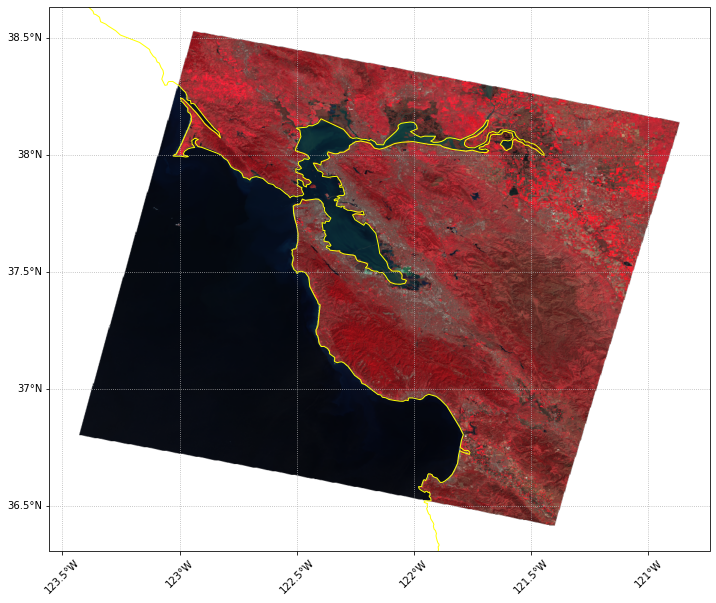

In [14]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(image, vis_params=vis)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax,interval=0.5,xtick_rotation=45,linestyle=":")

# add the coastline
ax.coastlines(color="yellow")

show()

By default, if a region is not provided via the region keyword the whole extent of the image will be plotted as seen in the previous Landsat example. We can also zoom to a specific region of an image by defining the region to plot.

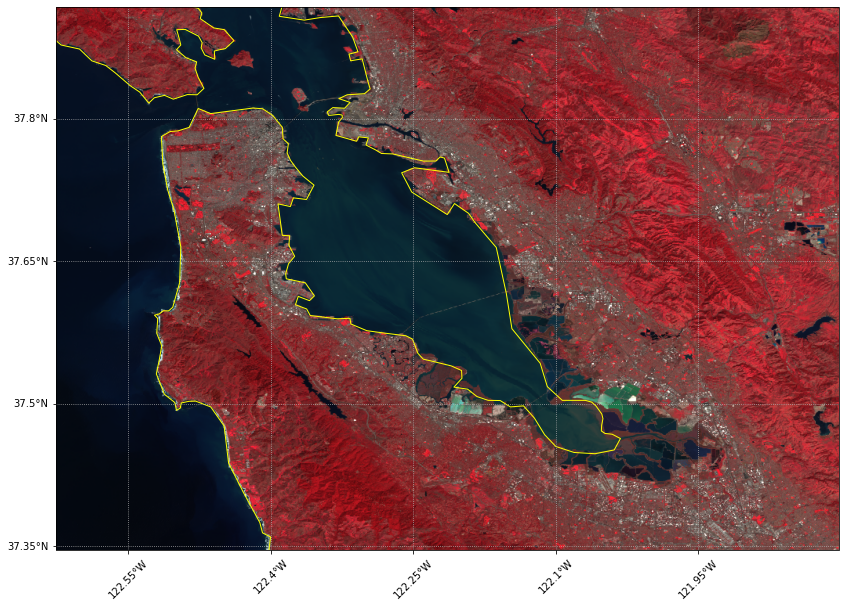

In [15]:
fig = plt.figure(figsize=(15, 10))

# here is the bounding box of the map extent we want to use
# formatted a [W,S,E,N]
zoom_region = [-122.6265, 37.3458, -121.8025, 37.9178]

# plot the map over the region of interest
ax = cartoee.get_map(image, vis_params=vis, region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=45, linestyle=":")

# add coastline
ax.coastlines(color="yellow")

show()

Adding north arrow and scale bar

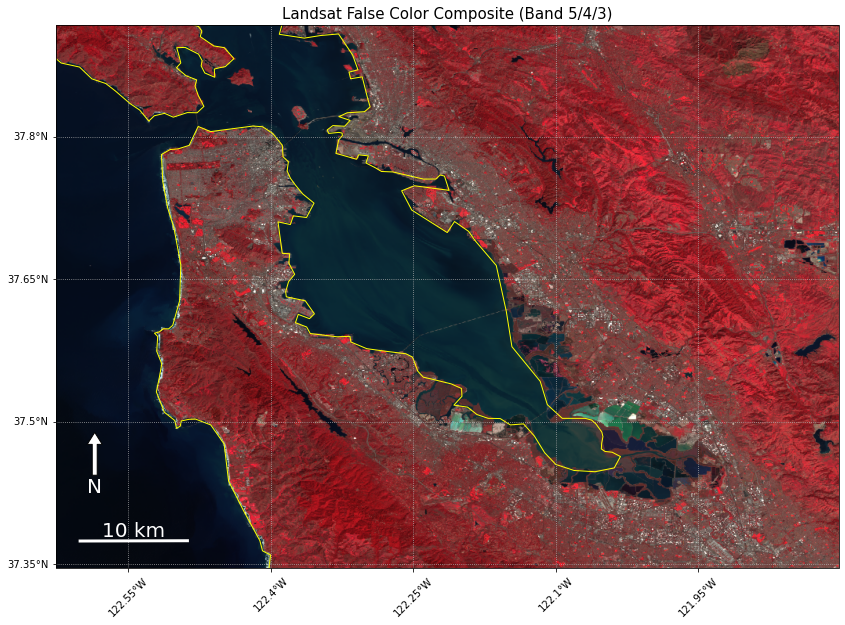

In [16]:
fig = plt.figure(figsize=(15, 10))

# here is the bounding box of the map extent we want to use
# formatted a [W,S,E,N]
zoom_region = [-122.6265, 37.3458, -121.8025, 37.9178]

# plot the map over the region of interest
ax = cartoee.get_map(image, vis_params=vis, region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=45, linestyle=":")

# add coastline
ax.coastlines(color="yellow")

# add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.05, 0.25), text_color="white", arrow_color="white", fontsize=20)

# add scale bar
cartoee.add_scale_bar(ax, length=10, xy=(0.1, 0.05), fontsize=20, color="white", unit="km")

ax.set_title(label = 'Landsat False Color Composite (Band 5/4/3)', fontsize=15)

show()